In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils # one hot encoding

In [2]:
# 1. DataLoader
(X_train, y_train), (X_test, y_test)=datasets.mnist.load_data()

In [3]:
# print(X_train[10])
# print(y_train[10])
X_train.shape
# y_train.shape

(60000, 28, 28)

In [4]:
# 2. X 입력 데이타 전처리
L,W,H = X_train.shape

X_train = X_train.reshape(-1, W * H) # 1차원으로 펼쳤다..60000, 784
X_test = X_test.reshape(-1, W * H) # 10000, 784



In [5]:
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])

In [6]:
# 3.  Y 입력 데이타 전처리
'''
output에서는 총 10개의 카테고리가 있다.
각각의 노드에서 이미지에 해당하는 예측값을 0~1사이의 확률분포로...
One Hot Encoding...np_utils.to_categorical()함수 사용한다.
'''

print(y_train[30])
print(y_train[9])

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print('*'* 40)
print(Y_train[30])
print(Y_test[9])

3
4
****************************************
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
# 4. Setting Hyperparameter
input_size = 28 * 28
hidden_size = 100
num_classes = 10
epochs = 10
batch_size=100

In [8]:
# 5. Model Generator
model=  models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
model.add(layers.Dense(num_classes, activation='softmax'))

In [9]:
# 6. compile
model.compile('sgd','categorical_crossentropy', metrics=['accuracy'])

In [10]:
# 7. 학습을 진행...fit()
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 2ms/step - loss: 1.1504 - accuracy: 0.7197 - val_loss: 0.6270 - val_accuracy: 0.8581
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.8618 - val_loss: 0.4459 - val_accuracy: 0.8848
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8830 - val_loss: 0.3846 - val_accuracy: 0.8961
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3933 - accuracy: 0.8924 - val_loss: 0.3525 - val_accuracy: 0.9031
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8982 - val_loss: 0.3318 - val_accuracy: 0.9080
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.9039 - val_loss: 0.3168 - val_accuracy: 0.9118
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.9074 - val_loss: 0.3042 - val_accuracy: 0.9160
Epoch 

In [11]:
# 8. 평가하기
model_performance=model.evaluate(X_test, Y_test, batch_size=batch_size)
print('loss:{}, accuracy:{}'.format(*model_performance))

100/100 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.9205
loss:0.28050485253334045, accuracy:0.9204999804496765


In [12]:
## 9. 시각화
# fit, 트레이닝할때 나오는 로그 메세지들을 다 모아서 리턴...history

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    
history=model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.9182 - val_loss: 0.2712 - val_accuracy: 0.9242
Epoch 2/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.9205 - val_loss: 0.2652 - val_accuracy: 0.9261
Epoch 3/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.9221 - val_loss: 0.2592 - val_accuracy: 0.9280
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9244 - val_loss: 0.2533 - val_accuracy: 0.9285
Epoch 5/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9264 - val_loss: 0.2480 - val_accuracy: 0.9302
Epoch 6/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.9283 - val_loss: 0.2432 - val_accuracy: 0.9320
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.2483 - accuracy: 0.9298 - val_loss: 0.2379 - val_accuracy: 0.9324
Epoch 

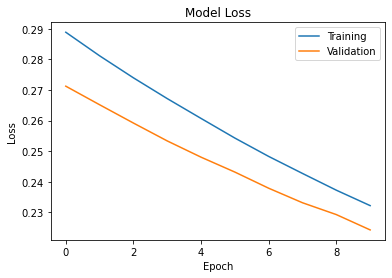

In [14]:
plot_loss(history)

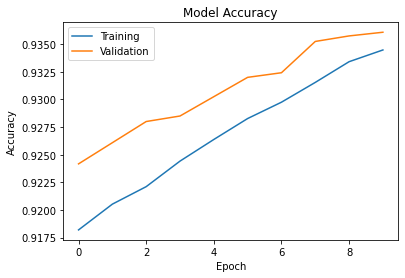

In [15]:
plot_acc(history)